![](LASSO.png)

Least Absolute Shrinkage and Selection Operator Regression(LASSO)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
def PolyReg(degree):
    return Pipeline([
        ("ploy",PolynomialFeatures(degree=degree)),
        ("std_scalar",StandardScaler()),
        ("lin_reg",lin_reg)
    ])

In [4]:
from sklearn.metrics import mean_squared_error
# 多项式回归
poly20_reg = PolyReg(degree=20)
poly20_reg.fit(X_train,y_train)
y20_predict = poly20_reg.predict(X_test)
mean_squared_error(y_test,y20_predict)

167.94010867772357

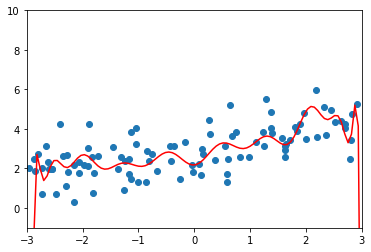

In [5]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)

    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,-1,10])
    plt.show()

plot_model(poly20_reg)

## LASSO

In [6]:
from sklearn.linear_model import Lasso

In [7]:
def LassoReg(degree,alpha):
    return Pipeline([
        ("ploy",PolynomialFeatures(degree=degree)),
        ("std_scalar",StandardScaler()),
        ("lasso_reg",Lasso(alpha=alpha))
    ])

In [9]:
lasso1_reg = LassoReg(20,0.01)
lasso1_reg.fit(X_train,y_train)
y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.149608084325997

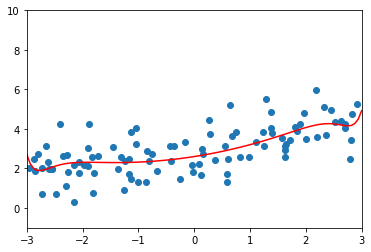

In [10]:
plot_model(lasso1_reg)

In [11]:
lasso2_reg = LassoReg(20,0.1)
lasso2_reg.fit(X_train,y_train)
y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.1213911351818648

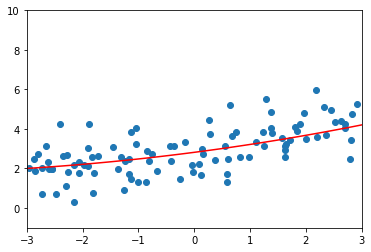

In [12]:
plot_model(lasso2_reg)

In [13]:
lasso3_reg = LassoReg(20,1)
lasso3_reg.fit(X_train,y_train)
y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test,y3_predict)

1.8408939659515595

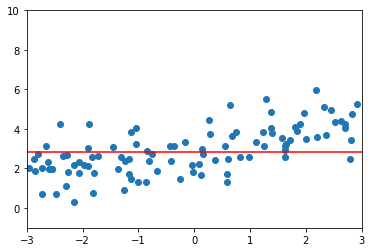

In [14]:
plot_model(lasso3_reg)

![](比较ridge和lasso.png)
![](LASSO特征.png)

# 8.10

![](比较Ridge和LASSO的公式.png)

正则化      模型好坏     样本间距离  

L1正则，L2正则
![](正则.png)

# L0正则
![](L0.png)
因为后面的那一项，是离散值，需要穷举所有可能的子集

# 弹性网
![](弹性网.png)

这种结合类似：批量梯度下降法-随机梯度下降法，结合成小批量梯度下降法